# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
rideshare=pd.read_csv("rideshare_kaggle.csv")
rideshare.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
# Get the data types of all columns
column_types = rideshare.dtypes

# Count the numerical and categorical columns
numerical_count = sum(column_types == 'int64') + sum(column_types == 'float64')
categorical_count = sum(column_types == 'object')

print("Total numerical columns:", numerical_count)
print("Total categorical columns:", categorical_count)

Total numerical columns: 46
Total categorical columns: 11


# Data Preprocessing

In [4]:
rideshare.shape

(693071, 57)

In [5]:
rideshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [6]:
#Converting Datetime column to datetime datatype
rideshare['datetime']=pd.to_datetime(rideshare['datetime'])

In [7]:
# Checking if there are duplicated rows
print('{} of data is duplicated rows'.format(
    str(round(rideshare.duplicated().sum() / rideshare.size * 100,5))+'%'))

0.0% of data is duplicated rows


In [8]:
# Checking if there are Nulvalues
print('{} of data is NuLL'.format(
    str(round(rideshare.isna().sum().sum() / rideshare.size * 100,3))+'%'))


0.139% of data is NuLL


[Text(0, 0, '0'),
 Text(0, 50000, '50000'),
 Text(0, 100000, '100000'),
 Text(0, 150000, '150000'),
 Text(0, 200000, '200000'),
 Text(0, 250000, '250000'),
 Text(0, 300000, '300000'),
 Text(0, 350000, '350000'),
 Text(0, 400000, '400000'),
 Text(0, 450000, '450000'),
 Text(0, 500000, '500000'),
 Text(0, 550000, '550000'),
 Text(0, 600000, '600000'),
 Text(0, 650000, '650000')]

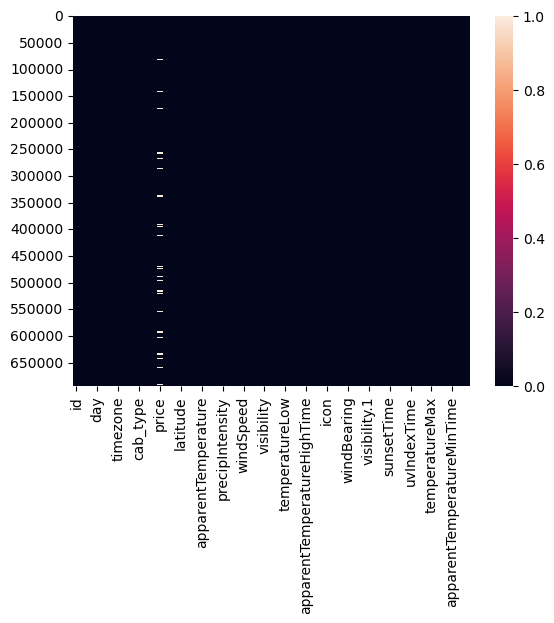

In [9]:
#Checking the distribution of null values
cols = rideshare.columns
heatmap = sns.heatmap(rideshare[cols].isnull())

yticks = range(0, len(rideshare), 50000)
heatmap.set_yticks(yticks)
heatmap.set_yticklabels(yticks)

# only price columns has all the null values

In [10]:
rideshare.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [11]:
#info on null records
null_records = rideshare.isnull().sum().sum()
print('The number of null records in the dataset : ', null_records)

The number of null records in the dataset :  55095


In [12]:
# to remove the null records
rideshare.dropna(axis=0,inplace=True)

In [13]:
# verifying if there are any null records
updated_null_records = rideshare.isnull().sum().sum()
updated_null_records

0

In [14]:
# visibility and visibility.1 are duplicate columns hence removing
## self comment - df['visibility'].sum() check using this and see if you get the same total with vis1 or
visibilityCheck = rideshare['visibility'].equals(rideshare['visibility.1'])
visibilityCheck
df = rideshare.drop(['visibility.1'],axis=1)

In [15]:
#Delete some features using Domain knowledge
rideshare = rideshare.drop(['id','timestamp','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','temperatureHighTime','apparentTemperatureMaxTime'
                 ,'latitude','longitude','product_id'],axis = 1)
print(rideshare.shape)
rideshare.head()

(637976, 40)


,hour,day,month,datetime,timezone,source,destination,cab_type,name,price,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,Shared,5.0,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,Lux,11.0,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,Lyft,7.0,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,Lyft XL,9.0,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [16]:
# Delete data time and Year because all data in the same year
rideshare = rideshare.drop(['datetime'],axis = 1)
print(rideshare.shape)
rideshare.head()

(637976, 39)


,hour,day,month,timezone,source,destination,cab_type,name,price,distance,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [17]:
# Delete timezone because all data in the same timezone
rideshare = rideshare.drop(['timezone'],axis = 1)
print(rideshare.shape)
rideshare.head()

(637976, 38)


,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


# Data **Preprocessing**

## Correlation check between Price and other Numerical columns

In [18]:
from scipy.stats import chi2_contingency
import pandas as pd

# Identify categorical variables
categorical_columns = rideshare.select_dtypes(include=['object']).columns

# Loop through each pair of categorical variables
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:  # Avoid comparing the same column
            contingency_table = pd.crosstab(rideshare[col1], rideshare[col2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            if p < 0.05:  # Check if p-value is less than 0.05
                print(f"Chi-square test between {col1} and {col2}:")
                print(f"Chi-square statistic: {chi2}")
                print(f"P-value: {p}")
                print("")

Chi-square test between source and destination:
Chi-square statistic: 639065.0981259252
P-value: 0.0

Chi-square test between source and short_summary:
Chi-square statistic: 261.0667957873184
P-value: 4.74400158193103e-19

Chi-square test between source and long_summary:
Chi-square statistic: 292.04589627063706
P-value: 1.9784045805130552e-18

Chi-square test between source and icon:
Chi-square statistic: 220.22701376912386
P-value: 1.7537131932767997e-18

Chi-square test between destination and source:
Chi-square statistic: 639065.0981259252
P-value: 0.0

Chi-square test between destination and short_summary:
Chi-square statistic: 299.97359188629844
P-value: 6.249291691800728e-25

Chi-square test between destination and long_summary:
Chi-square statistic: 327.54664143535047
P-value: 1.7857374763664068e-23

Chi-square test between destination and icon:
Chi-square statistic: 288.4210642334648
P-value: 1.398873860315573e-29

Chi-square test between cab_type and name:
Chi-square statistic

c:\Users\anees\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


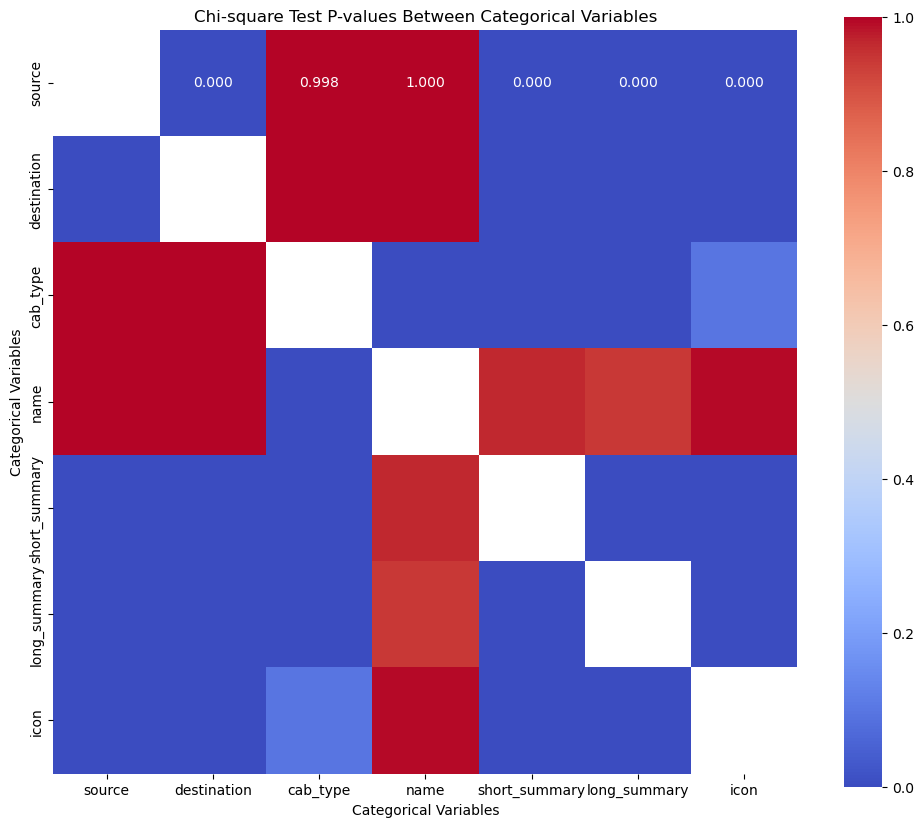

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Create an empty DataFrame to store p-values
p_values_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Loop through each pair of categorical variables
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:  # Avoid comparing the same column
            contingency_table = pd.crosstab(rideshare[col1], rideshare[col2])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            p_values_df.loc[col1, col2] = p

# Convert p-values to numeric
p_values_df = p_values_df.apply(pd.to_numeric)

# Plot heatmap with adjusted size and font size
plt.figure(figsize=(12, 10))  # Adjust the size of the heatmap
sns.heatmap(p_values_df, annot=True, cmap="coolwarm", fmt=".3f", cbar=True, square=True, annot_kws={"size": 10})  # Adjust font size
plt.title("Chi-square Test P-values Between Categorical Variables")
plt.xlabel("Categorical Variables")
plt.ylabel("Categorical Variables")
plt.show()


In [20]:
# Assuming categorical_columns is defined correctly before this code snippet

print(categorical_columns)

# Check if categorical_columns contains the correct column names of categorical variables



Index(['source', 'destination', 'cab_type', 'name', 'short_summary',
       'long_summary', 'icon'],
      dtype='object')


### Anova Test

In [21]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming your outcome variable 'price' and categorical variables are in a DataFrame called 'data'

# Define the formula for ANOVA
formula = 'price ~ C(source) + C(destination) + C(cab_type) + C(name) + C(short_summary) + C(long_summary) + C(icon)'

# Fit the ANOVA model
model = ols(formula, data=rideshare).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)

                        sum_sq        df         F    PR(>F)
C(source)         7.636179e+01      11.0  0.448083  0.503247
C(destination)    7.636179e+01      11.0  0.448083  0.503247
C(cab_type)       6.941981e+00       1.0  0.448083  0.503247
C(name)           7.636179e+01      11.0  0.448083  0.503247
C(short_summary)  5.553585e+01       8.0  0.448083  0.503247
C(long_summary)   4.163872e+02      10.0  2.687650  0.002724
C(icon)           4.165189e+01       6.0  0.448083  0.503247
Residual          9.883080e+06  637922.0       NaN       NaN


c:\Users\anees\anaconda\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\Users\anees\anaconda\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\Users\anees\anaconda\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\Users\anees\anaconda\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c

In [22]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming your outcome variable 'price' and categorical variables are in a DataFrame called 'rideshare'

# List of categorical columns
categorical_columns = ['source', 'destination', 'cab_type', 'name', 'short_summary', 'long_summary', 'icon']

# Perform ANOVA for each categorical column separately
for column in categorical_columns:
    # Define the formula for ANOVA for the current column
    formula = f'price ~ C({column})'

    # Fit the ANOVA model
    model = ols(formula, data=rideshare).fit()

    # Perform ANOVA
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Print ANOVA table
    print(f"ANOVA for {column}:")
    print(anova_table)
    print()  # Add a newline for readability



ANOVA for source:
                 sum_sq        df            F  PR(>F)
C(source)  1.382476e+06      11.0  1482.453058     0.0
Residual   5.408541e+07  637964.0          NaN     NaN

ANOVA for destination:
                      sum_sq        df            F  PR(>F)
C(destination)  1.250215e+06      11.0  1337.356566     0.0
Residual        5.421767e+07  637964.0          NaN     NaN

ANOVA for cab_type:
                   sum_sq        df            F  PR(>F)
C(cab_type)  3.856740e+05       1.0  4466.959446     0.0
Residual     5.508221e+07  637974.0          NaN     NaN

ANOVA for name:
                sum_sq        df              F  PR(>F)
C(name)   4.294443e+07      11.0  198877.843591     0.0
Residual  1.252345e+07  637964.0            NaN     NaN

ANOVA for short_summary:
                        sum_sq        df         F    PR(>F)
C(short_summary)  7.253262e+02       8.0  1.042811  0.400751
Residual          5.546716e+07  637967.0       NaN       NaN

ANOVA for long_summary:
  

In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming your outcome variable 'price' and categorical variables are in a DataFrame called 'rideshare'

# List of categorical columns
categorical_columns = ['source', 'destination', 'cab_type', 'name', 'short_summary', 'long_summary', 'icon']

# Create an empty DataFrame to store p-values
p_values_df = pd.DataFrame(columns=['Categorical Column', 'P-Value'])

# Perform ANOVA for each categorical column separately
for column in categorical_columns:
    # Define the formula for ANOVA for the current column
    formula = f'price ~ C({column})'

    # Fit the ANOVA model
    model = ols(formula, data=rideshare).fit()

    # Perform ANOVA
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Extract the p-value from the ANOVA table
    p_value = anova_table['PR(>F)'][0]

    # Append the result to the DataFrame
    p_values_df = pd.concat([p_values_df, pd.DataFrame({'Categorical Column': [column], 'P-Value': [p_value]})], ignore_index=True)

# Print the DataFrame containing p-values
print("P-Values for Categorical Columns:")
print(p_values_df)


C:\Users\anees\AppData\Local\Temp\ipykernel_5924\653860710.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\anees\AppData\Local\Temp\ipykernel_5924\653860710.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  p_values_df = pd.concat([p_values_df, pd.DataFrame({'Categorical Column': [column], 'P-Value': [p_value]})], ignore_index=True)
C:\Users\anees\AppData\Local\Temp\ipykernel_5924\653860710.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys

P-Values for Categorical Columns:
  Categorical Column   P-Value
0             source  0.000000
1        destination  0.000000
2           cab_type  0.000000
3               name  0.000000
4      short_summary  0.400751
5       long_summary  0.762488
6               icon  0.383506


C:\Users\anees\AppData\Local\Temp\ipykernel_5924\653860710.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


C:\Users\anees\AppData\Local\Temp\ipykernel_5924\1311358327.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_values[column] = anova_table['PR(>F)'][0]
C:\Users\anees\AppData\Local\Temp\ipykernel_5924\1311358327.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_values[column] = anova_table['PR(>F)'][0]
C:\Users\anees\AppData\Local\Temp\ipykernel_5924\1311358327.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_values[

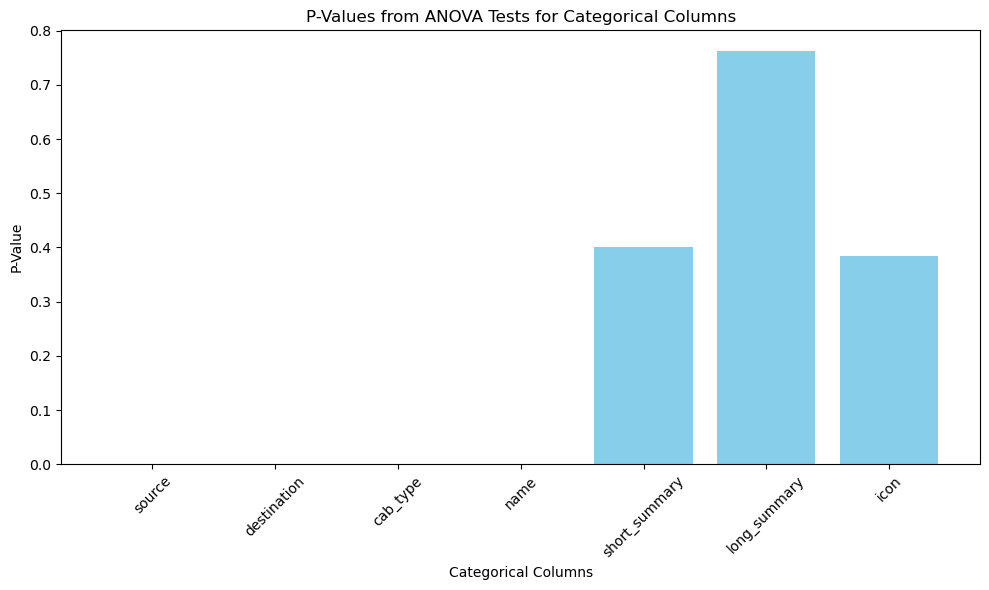

In [24]:
import matplotlib.pyplot as plt

# Create an empty dictionary to store p-values
p_values = {}

# Perform ANOVA for each categorical column separately
for column in categorical_columns:
    # Define the formula for ANOVA for the current column
    formula = f'price ~ C({column})'

    # Fit the ANOVA model
    model = ols(formula, data=rideshare).fit()

    # Perform ANOVA
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Extract the p-value from the ANOVA table and store it in the dictionary
    p_values[column] = anova_table['PR(>F)'][0]

# Create a bar plot of p-values
plt.figure(figsize=(10, 6))
plt.bar(p_values.keys(), p_values.values(), color='skyblue')
plt.xlabel('Categorical Columns')
plt.ylabel('P-Value')
plt.title('P-Values from ANOVA Tests for Categorical Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


To check for correaltion between different numerical columns with the outcome variable price, we can split the numerical columns into 2 groups, i.e climate_variables and temperature variables.

### Lets check the correlation of our temperature related features with our target feature (Price)

In [25]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [26]:
df_temp = rideshare[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,42.18,29.11,35.75,9.0


In [27]:
df_temp.corr()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
temperature,1.000000,0.946157,0.788564,0.502193,0.710386,0.382828,0.789220,0.780426,0.817443,0.703078,-0.000084
apparentTemperature,0.946157,1.000000,0.821492,0.573985,0.811624,0.495844,0.697343,0.792476,0.786478,0.782255,-0.000193
temperatureHigh,0.788564,0.821492,1.000000,0.611616,0.958722,0.534808,0.794579,0.985996,0.877508,0.951037,-0.000516
temperatureLow,0.502193,0.573985,0.611616,1.000000,0.629284,0.933931,0.473054,0.567522,0.636257,0.579368,0.000182
apparentTemperatureHigh,0.710386,0.811624,0.958722,0.629284,1.000000,0.602182,0.665030,0.926408,0.791979,0.974276,-0.000261
apparentTemperatureLow,0.382828,0.495844,0.534808,0.933931,0.602182,1.000000,0.284247,0.492195,0.479351,0.558125,0.000831
temperatureMin,0.789220,0.697343,0.794579,0.473054,0.665030,0.284247,1.000000,0.782981,0.953828,0.648346,-0.000428
temperatureMax,0.780426,0.792476,0.985996,0.567522,0.926408,0.492195,0.782981,1.000000,0.838385,0.956333,-0.000550
apparentTemperatureMin,0.817443,0.786478,0.877508,0.636257,0.791979,0.479351,0.953828,0.838385,1.000000,0.741929,-0.000580
apparentTemperatureMax,0.703078,0.782255,0.951037,0.579368,0.974276,0.558125,0.648346,0.956333,0.741929,1.000000,-0.000290


<Axes: >

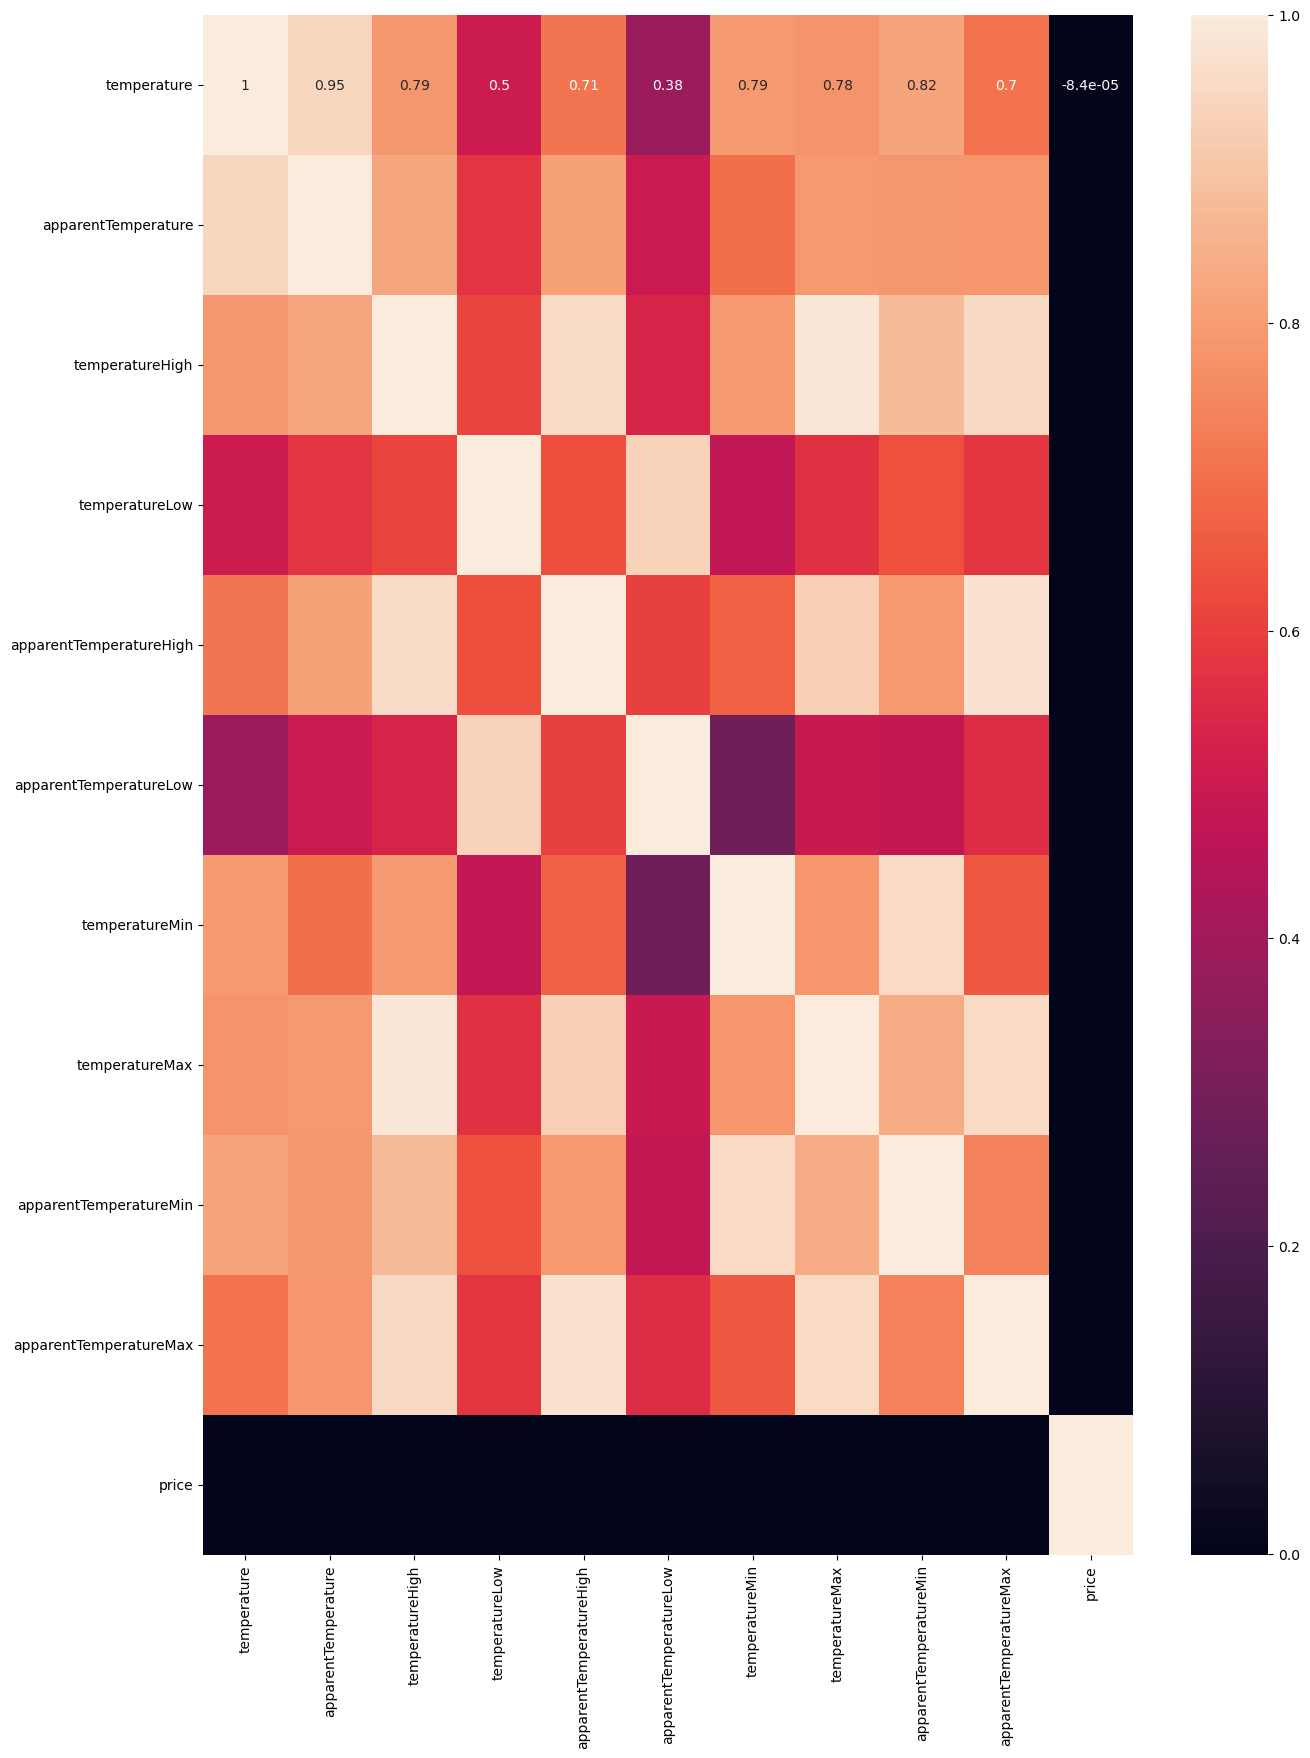

In [28]:
plt.figure(figsize=(15,20))
sns.heatmap(df_temp.corr(),annot=True)

Lets check the correlation of our Climate related features with our target feature (Price)

In [29]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = rideshare[climate_column]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<Axes: >

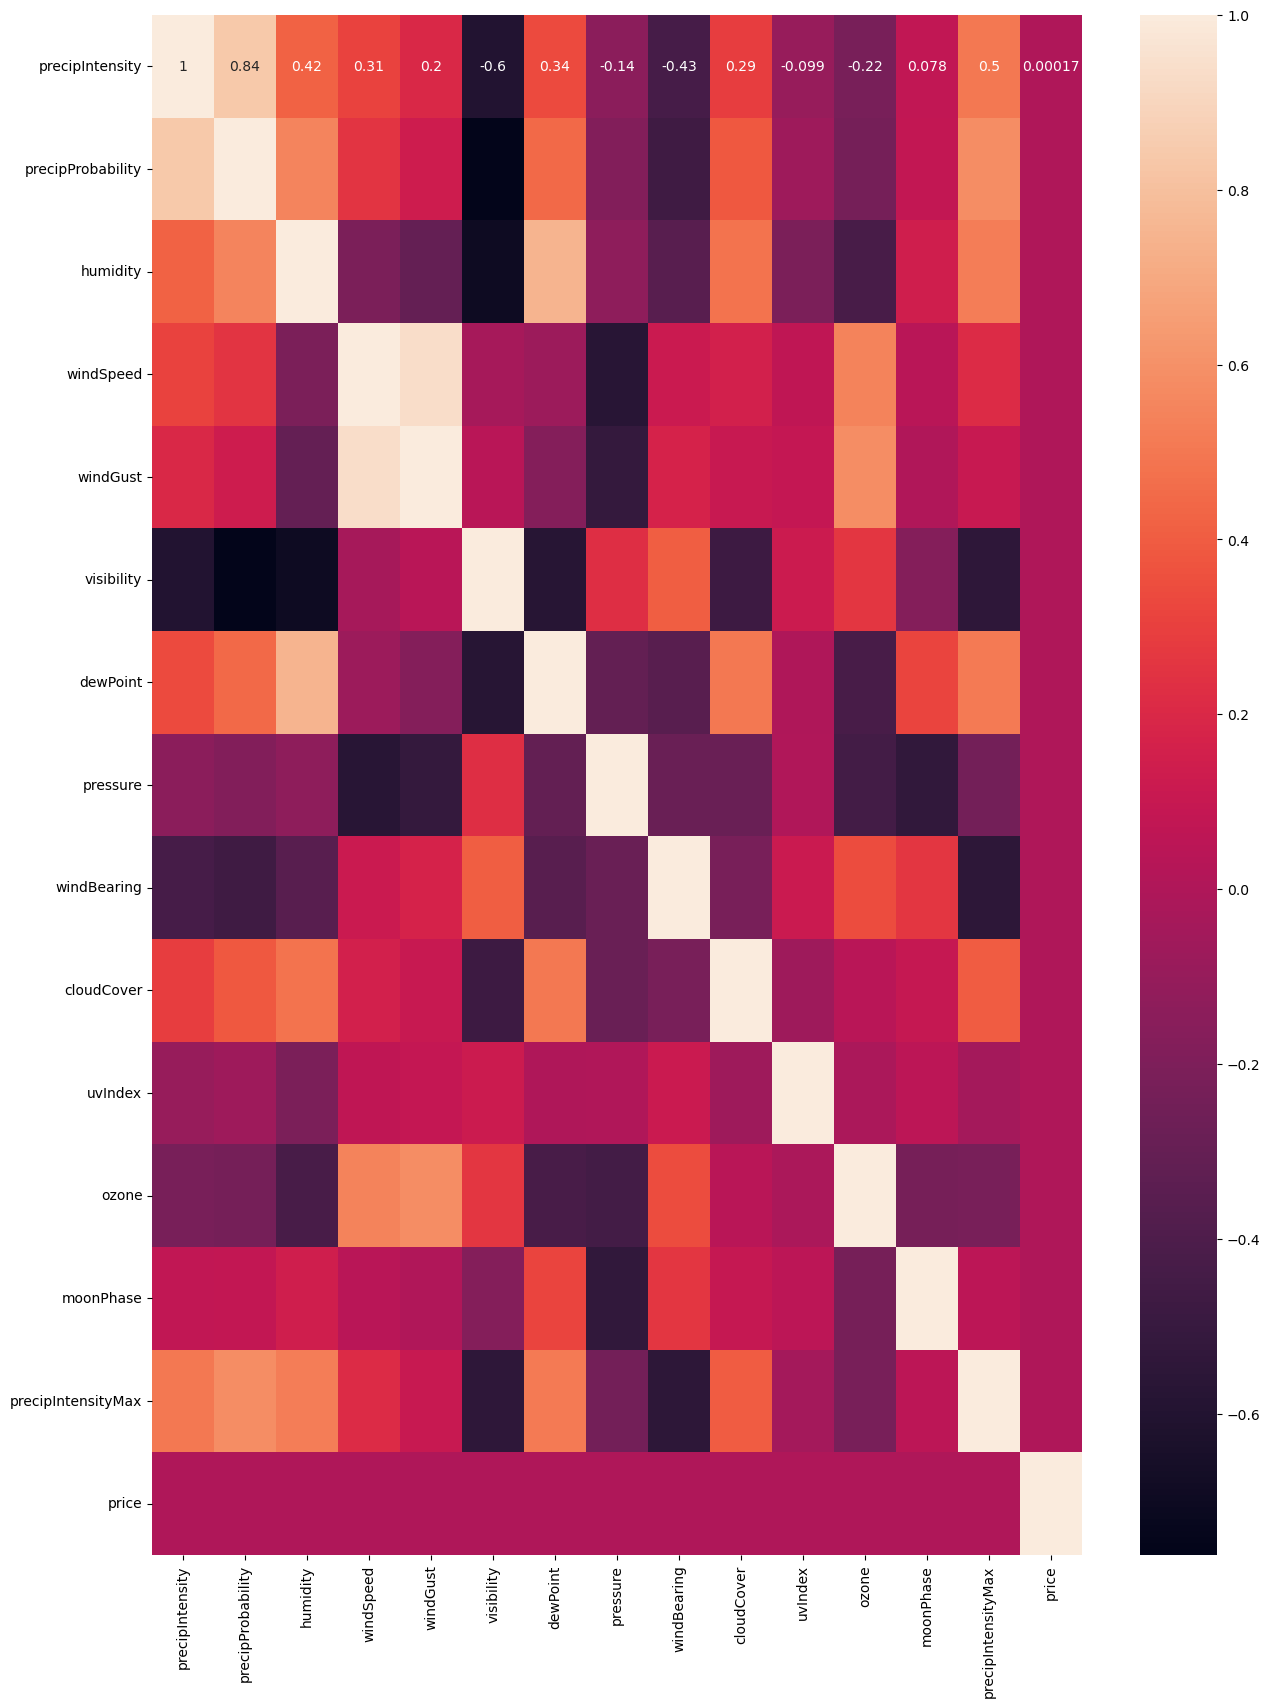

In [30]:
plt.figure(figsize=(15,20))
sns.heatmap(df_clim.corr(),annot=True)

In [31]:
remaining_columns = ['temperature','humidity','visibility','distance', 'surge_multiplier','price']
df_remaining = rideshare[remaining_columns]
df_remaining.head()

,temperature,humidity,visibility,distance,surge_multiplier,price
0,42.34,0.68,10.000,0.44,1.0,5.0
1,43.58,0.94,4.786,0.44,1.0,11.0
2,38.33,0.75,10.000,0.44,1.0,7.0
3,34.38,0.73,10.000,0.44,1.0,26.0
4,37.44,0.70,10.000,0.44,1.0,9.0


<Axes: >

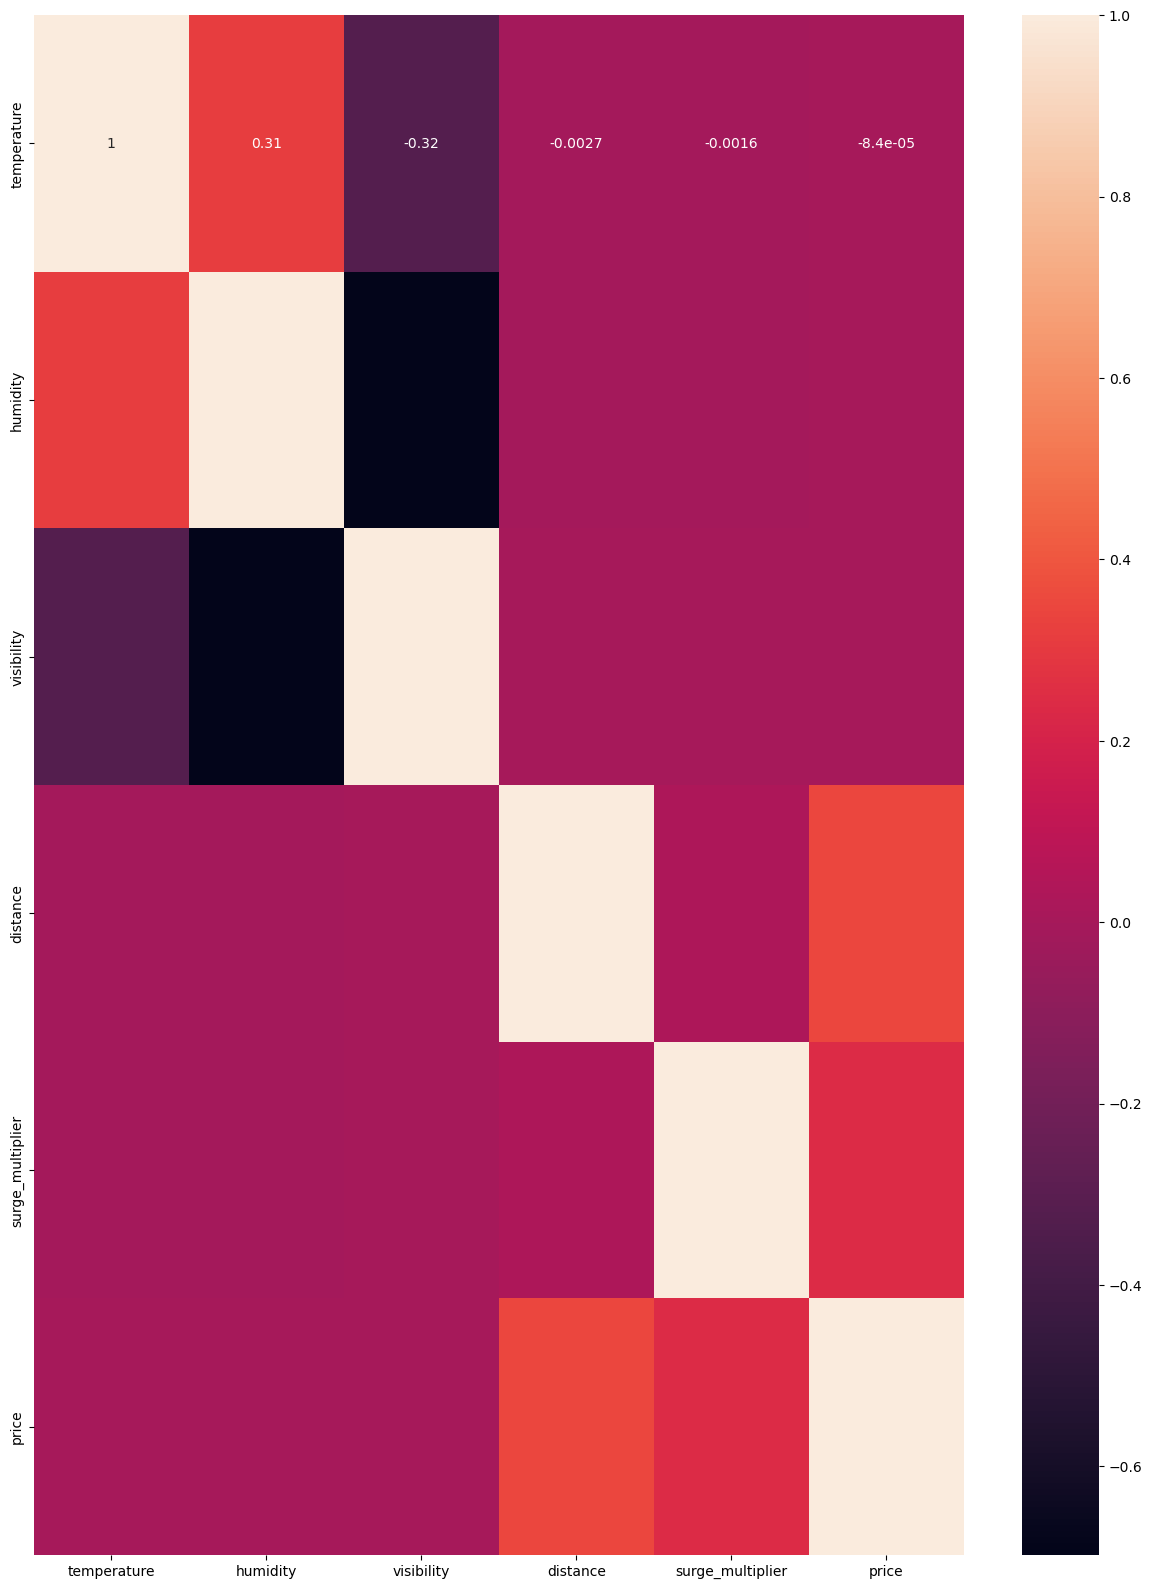

In [32]:
plt.figure(figsize=(15,20))
sns.heatmap(df_remaining.corr(),annot=True)

In [33]:
print("Correlation Values")
df_remaining.corr()

Correlation Values


,temperature,humidity,visibility,distance,surge_multiplier,price
temperature,1.000000,0.313813,-0.324158,-0.002738,-0.001594,-0.000084
humidity,0.313813,1.000000,-0.697860,-0.003849,-0.001677,-0.001238
visibility,-0.324158,-0.697860,1.000000,0.004143,0.001716,0.001497
distance,-0.002738,-0.003849,0.004143,1.000000,0.025946,0.345061
surge_multiplier,-0.001594,-0.001677,0.001716,0.025946,1.000000,0.240458
price,-0.000084,-0.001238,0.001497,0.345061,0.240458,1.000000


In [34]:
column_names = rideshare.columns
print(column_names)
rideshare.info()

Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name',
       'price', 'distance', 'surge_multiplier', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'icon', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin',
       'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 38 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hour                     637976 non-null  int64  
 1   day                      637976 non-null  int64  
 2   m

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the column indices to be one-hot encoded
categorical_columns = [3, 4, 5, 6, 12, 13, 24]

# Create ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')

# Fit and transform the data
rideshare_encoded = ct.fit_transform(rideshare)

# Get the feature names after encoding
encoded_column_names = ct.named_transformers_['encoder'].get_feature_names_out(input_features=rideshare.columns[categorical_columns])

# Create a DataFrame with the encoded data and feature names
rideshare_encoded_df = pd.DataFrame(rideshare_encoded, columns=list(encoded_column_names) + list(rideshare.columns.drop(rideshare.columns[categorical_columns])))


In [36]:
rideshare_encoded=rideshare_encoded_df.drop(columns=['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','short_summary_ Clear ',
       'short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ',
       'long_summary_ Foggy in the morning. ',
       'long_summary_ Light rain in the morning and overnight. ',
       'long_summary_ Light rain in the morning. ',
       'long_summary_ Light rain until evening. ',
       'long_summary_ Mostly cloudy throughout the day. ',
       'long_summary_ Overcast throughout the day. ',
       'long_summary_ Partly cloudy throughout the day. ',
       'long_summary_ Possible drizzle in the morning. ',
       'long_summary_ Rain in the morning and afternoon. ',
       'long_summary_ Rain throughout the day. ',
       'long_summary_ Rain until morning, starting again in the evening. ',
       'icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ', 'icon_ rain ',
       'hour', 'day', 'month','visibility.1'],axis=1)

In [37]:
rideshare_encoded.head()

,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,...,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,price,distance,surge_multiplier
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.44,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.44,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.44,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.44,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.44,1.0


In [38]:
rideshare_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   source_Back Bay                      637976 non-null  float64
 1   source_Beacon Hill                   637976 non-null  float64
 2   source_Boston University             637976 non-null  float64
 3   source_Fenway                        637976 non-null  float64
 4   source_Financial District            637976 non-null  float64
 5   source_Haymarket Square              637976 non-null  float64
 6   source_North End                     637976 non-null  float64
 7   source_North Station                 637976 non-null  float64
 8   source_Northeastern University       637976 non-null  float64
 9   source_South Station                 637976 non-null  float64
 10  source_Theatre District              637976 non-null  float64
 11  source_West E

In [39]:
column_names = rideshare_encoded.columns
print(column_names)
rideshare_encoded.shape

Index(['source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'cab_type_Lyft', 'cab_type_Uber', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV', 'price', 'distance',
       'surge_multipli

(637976, 41)

In [40]:
from sklearn.preprocessing import StandardScaler

# Load the function, selective import
scaler = StandardScaler()

# Define the previously encoded and transformed data
rideshare_standardized = scaler.fit_transform(rideshare_encoded.drop('price',axis=1))

# Convert the scaled array back into a DataFrame with original column names
rideshare_standardized_df = pd.DataFrame(rideshare_standardized, columns=rideshare_encoded.drop('price',axis=1).columns)

# Now, rideshare_standardized_df contains the scaled data with preserved column names

In [41]:
print("Cleaned Dataset")
rideshare_standardized_df.head()

Cleaned Dataset


,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,...,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,distance,surge_multiplier
0,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,3.317226,-0.301531,-0.299687,-0.301509,-0.301497,...,-0.295502,-0.295502,-0.295502,3.384146,-0.307432,-0.307441,-0.307447,-0.307447,-1.54064,-0.157905
1,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,3.317226,-0.301531,-0.299687,-0.301509,-0.301497,...,-0.295502,-0.295502,-0.295502,-0.295496,-0.307432,-0.307441,-0.307447,-0.307447,-1.54064,-0.157905
2,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,3.317226,-0.301531,-0.299687,-0.301509,-0.301497,...,-0.295502,3.384074,-0.295502,-0.295496,-0.307432,-0.307441,-0.307447,-0.307447,-1.54064,-0.157905
3,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,3.317226,-0.301531,-0.299687,-0.301509,-0.301497,...,3.384074,-0.295502,-0.295502,-0.295496,-0.307432,-0.307441,-0.307447,-0.307447,-1.54064,-0.157905
4,-0.301624,-0.300509,-0.301534,-0.301515,-0.304694,3.317226,-0.301531,-0.299687,-0.301509,-0.301497,...,-0.295502,-0.295502,3.384074,-0.295496,-0.307432,-0.307441,-0.307447,-0.307447,-1.54064,-0.157905


In [42]:
rideshare_standardized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   source_Back Bay                      637976 non-null  float64
 1   source_Beacon Hill                   637976 non-null  float64
 2   source_Boston University             637976 non-null  float64
 3   source_Fenway                        637976 non-null  float64
 4   source_Financial District            637976 non-null  float64
 5   source_Haymarket Square              637976 non-null  float64
 6   source_North End                     637976 non-null  float64
 7   source_North Station                 637976 non-null  float64
 8   source_Northeastern University       637976 non-null  float64
 9   source_South Station                 637976 non-null  float64
 10  source_Theatre District              637976 non-null  float64
 11  source_West E

In [43]:
if isinstance(rideshare_standardized_df, pd.DataFrame):
    print("rideshare_standardized_df is a DataFrame.")
else:
    print("rideshare_standardized_df is not a DataFrame.")

rideshare_standardized_df is a DataFrame.


# Splitting the dataset

In [44]:
from sklearn.model_selection import train_test_split

X = rideshare_standardized_df
y = rideshare_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
print('{} of data is NuLL'.format(
    str(round(rideshare_encoded.isna().sum().sum() / rideshare.size * 100,3))+'%'))

0.0% of data is NuLL


In [46]:
y.head()

0     5.0
1    11.0
2     7.0
3    26.0
4     9.0
Name: price, dtype: float64

# Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

## Obtain and report MAE
e_train = y_train - y_train_pred
e_test = y_test - y_test_pred
MAE_train = np.mean(np.abs(e_train))
MAE_test = np.mean(np.abs(e_test))
print("MAE of the training set for Linear Regression Model is",MAE_train)
print("MAE of the test set for Linear Regression Model is",MAE_test)
print("")
print("MSE of Training set for Linear Regression Model is", np.round(mean_squared_error(y_train,y_train_pred),3))
print("MSE of Testing set for Linear Regression Model is", np.round(mean_squared_error(y_test,y_test_pred),3))
print("")

## Get R-squared value for training and test set
from sklearn.metrics import r2_score
print("The R-squared value of the training set for Linear Regression Model is",np.round(r2_score(y_train,y_train_pred),3))
print("The R-squared value of the test set for Linear Regression Model is",np.round(r2_score(y_test,y_test_pred),3))

MAE of the training set for Linear Regression Model is 1.7551249502922814
MAE of the test set for Linear Regression Model is 1.743523626375266

MSE of Training set for Linear Regression Model is 6.258
MSE of Testing set for Linear Regression Model is 6.091

The R-squared value of the training set for Linear Regression Model is 0.928
The R-squared value of the test set for Linear Regression Model is 0.929


# Polynomial Regression

In [49]:
## Train the model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# S1. Define estimator: use make_pipeline to combine two functions.
poly_grid = PolynomialFeatures()
my_lr_grid = LinearRegression()

# S1. Apply polynomial regression in pipeline
my_poly_reg_grid = make_pipeline(poly_grid, my_lr_grid)

# S2. Define grid of parameter.
my_poly_grids = { 'polynomialfeatures__degree'  : [2,3] }

# S3. Define GridSearchCV Estimation function, then train the model
grid_polyreg = GridSearchCV( my_poly_reg_grid, my_poly_grids, cv = 5 )

grid_polyreg.fit(X_train, y_train)

c:\Users\anees\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anees\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anees\anaconda\Lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\anees\anaconda\Lib\site-packages\sklearn\pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [2, 3]})

In [50]:
## Calculate and report the MSEs
from sklearn.metrics import mean_squared_error
y_poly_train_pred=grid_polyreg.predict(X_train)
y_poly_test_pred=grid_polyreg.predict(X_test)

## Obtain and report MAE
poly_train = y_train - y_poly_train_pred
poly_test = y_test - y_poly_test_pred
MAE_poly_train = np.mean(np.abs(poly_train))
MAE_poly_test = np.mean(np.abs(poly_test))

print("MAE of the training set for the Polynomial Model is",MAE_poly_train)
print("MAE of the test set for the Polynomial Model is",MAE_poly_test)
print("")
print("MSE of Training set for the Polynomial Model is", np.round(mean_squared_error(y_train,y_poly_train_pred),3))
print("MSE oof Testing set for the Polynomial Model is", np.round(mean_squared_error(y_test,y_poly_test_pred),3))
print("")

## Obtain the test R-squared
from sklearn.metrics import r2_score
print("The R-squared value of the training set for the Polynomial Model is",np.round(r2_score(y_train,y_poly_train_pred),3))
print("The R-squared value of the test set for the Polynomial Model is", np.round(r2_score(y_test,y_poly_test_pred),3))

MAE of the training set for the Polynomial Model is 1.1755809367892207
MAE of the test set for the Polynomial Model is 1.1712069300287073

MSE of Training set for the Polynomial Model is 3.084
MSE oof Testing set for the Polynomial Model is 3.016

The R-squared value of the training set for the Polynomial Model is 0.965
The R-squared value of the test set for the Polynomial Model is 0.965


# Decision Tree

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
opt_tree = DecisionTreeRegressor(random_state = 0)

param_grid_dt = {'max_depth':  range(1,21)}

grid_search_dt = GridSearchCV(opt_tree, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': range(1, 21)})

In [52]:
best_parameter_dt = grid_search_dt.best_params_['max_depth']
print("Best max_depth chosen:", best_parameter_dt)

Best max_depth chosen: 20


In [53]:
## Calculate and report the MSEs
from sklearn.metrics import mean_squared_error
y_DT_train_pred=grid_search_dt.predict(X_train)
y_DT_test_pred=grid_search_dt.predict(X_test)

## Obtain and report MAE
DT_train = y_train - y_DT_train_pred
DT_test = y_test - y_DT_test_pred
MAE_DT_train = np.mean(np.abs(DT_train))
MAE_DT_test = np.mean(np.abs(DT_test))

print("MAE of the training set for the Decision Tree Model is",MAE_DT_train)
print("MAE of the test set for the Decision Tree Model is",MAE_DT_test)
print("")
print("MSE of Training set for the Decision Tree Model is", np.round(mean_squared_error(y_train,y_DT_train_pred),3))
print("MSE of Testing set for the Decision Tree Model is", np.round(mean_squared_error(y_test,y_DT_test_pred),3))
print("")

## Obtain the test R-squared
from sklearn.metrics import r2_score
print("The R2 Score on Training Data for Decision Tree model is", np.round(r2_score(y_train,y_DT_train_pred),3))
print("The R2 Score on Testing Data for Decision Tree model is", np.round(r2_score(y_test,y_DT_test_pred),3))

MAE of the training set for the Decision Tree Model is 0.9741332875641723
MAE of the test set for the Decision Tree Model is 1.0389105545882518

MSE of Training set for the Decision Tree Model is 2.428
MSE of Testing set for the Decision Tree Model is 2.723

The R2 Score on Training Data for Decision Tree model is 0.972
The R2 Score on Testing Data for Decision Tree model is 0.968


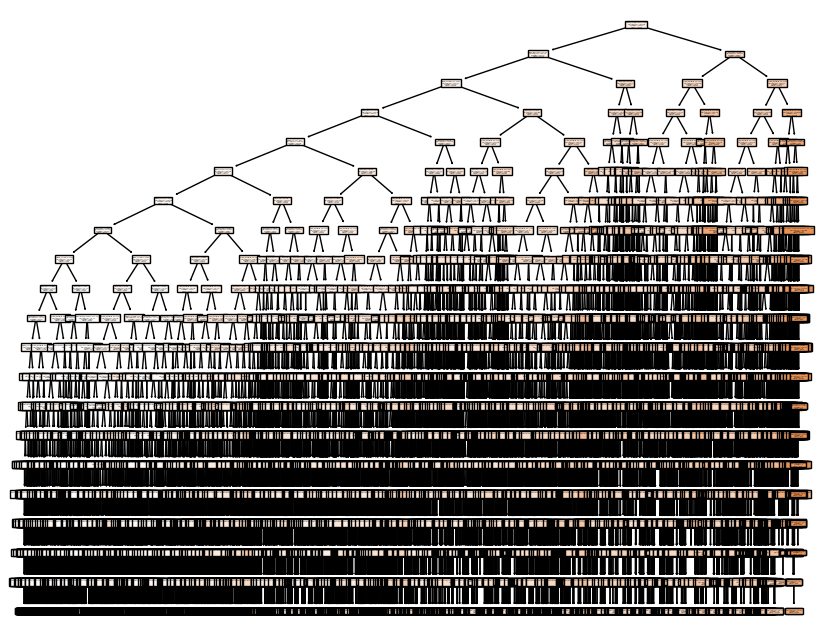

In [54]:
from sklearn.tree import plot_tree


# Plotting the decision tree
plt.figure(figsize=(10, 8))
plot_tree(grid_search_dt.best_estimator_, filled=True, feature_names=X.columns)  # Replace 'X.columns' with your feature names if available
plt.show()

# Random Forest

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
Random_Forest = RandomForestRegressor(random_state = 0)

param_grid_rt = {'n_estimators': (50,75,100,150), 'max_depth':  range(10,20)}

grid_search_rt = GridSearchCV(Random_Forest, param_grid_rt, cv=5)
grid_search_rt.fit(X_train, y_train)

In [ ]:
best_parameter_rt_depth = grid_search_rt.best_params_['max_depth']
print("Best max_depth chosen:", best_parameter_rt_depth)
print("")
best_parameter_rt_est = grid_search_rt.best_params_['n_estimators']
print("Best n_estimators chosen:", best_parameter_rt_est)

In [ ]:
## Calculate and report the MSEs
from sklearn.metrics import mean_squared_error
y_RT_train_pred=grid_search_rt.predict(X_train)
y_RT_test_pred=grid_search_rt.predict(X_test)

## Obtain and report MAE
RT_train = y_train - y_RT_train_pred
RT_test = y_test - y_RT_test_pred
MAE_RT_train = np.mean(np.abs(RT_train))
MAE_RT_test = np.mean(np.abs(RT_test))

print("MAE of the training set for the Random Forest Model is",MAE_RT_train)
print("MAE of the test set for the Random Forest Model is",MAE_RT_test)
print("")
print("MSE of Training set for the Random Forest Model is", np.round(mean_squared_error(y_train,y_RT_train_pred),3))
print("MSE of Testing set for the Random Forest Model is", np.round(mean_squared_error(y_test,y_RT_test_pred),3))
print("")

## Obtain the test R-squared
from sklearn.metrics import r2_score
print("The R2 Score of Training set for the Random Forest model is", np.round(r2_score(y_train,y_RT_train_pred),3))
print("The R2 Score of Testing set for the Random Forest model is", np.round(r2_score(y_test,y_RT_test_pred),3))

# Support Vector Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import  LinearSVR
Support_vector_regressor = LinearSVR()
params_svr = {'epsilon': [0.1,1,10,100,500,1000,10000]   }

grid_search_svr = GridSearchCV(Support_vector_regressor, params_svr, cv=5)

grid_search_svr.fit(X_train, y_train)

In [ ]:
best_parameter_svr = grid_search_svr.best_params_['epsilon']
print("Best C chosen:", best_parameter_svr)

In [ ]:
column_names = X.columns
print(column_names)

In [ ]:
## Calculate and report the MSEs
from sklearn.metrics import mean_squared_error
y_svr_train_pred=grid_search_svr.predict(X_train)
y_svr_test_pred=grid_search_svr.predict(X_test)

## Obtain and report MAE
SVR_train = y_train - y_svr_train_pred
SVR_test = y_test - y_svr_test_pred
MAE_SVR_train = np.mean(np.abs(SVR_train))
MAE_SVR_test = np.mean(np.abs(SVR_test))

print("MAE of the training set for the SVR Model is",MAE_SVR_train)
print("MAE of the test set for the SVR Model is",MAE_SVR_test)
print("")
print("MSE of Training set for the SVR Model is", np.round(mean_squared_error(y_train,y_svr_train_pred),3))
print("MSE of Testing set for the SVR Model is", np.round(mean_squared_error(y_test,y_svr_test_pred),3))

## Obtain the test R-squared
from sklearn.metrics import r2_score
print("The R2 Score of Training Data for the SVR Model is", np.round(r2_score(y_test,y_svr_test_pred),3))
print("The R2 Score of Testing Data for the SVR Model is", np.round(r2_score(y_test,y_svr_test_pred),3))